# Trump Tweets Word Cloud

I came across the `trump_tweets` dataset in the [dslabs](https://cran.r-project.org/web/packages/dslabs/dslabs.pdf) library containing all of President Trump’s tweets between 2009 and 2017. The source of the data is [Trump Twitter Archive](http://www.trumptwitterarchive.com/). 

I thought this was a perfect opportunity for a word cloud (i.e. [Tag cloud](https://en.wikipedia.org/wiki/Tag_cloud)). If you’re unfamiliar with what a word cloud is, it is a visual representation of the frequency of words appearing in some text. The larger the word, the more often it appears.

The steps I took to create the word cloud were very straightforward and mirrored the example here: [Text mining and word cloud fundamentals in R : 5 simple steps you should know](http://www.sthda.com/english/wiki/text-mining-and-word-cloud-fundamentals-in-r-5-simple-steps-you-should-know)

### The Word Cloud
To start, I wanted to show a word cloud on all <b>20,761</b> tweets that are compiled between <b>05/04/2009 and 01/01/2018</b>.

To start, I loaded all of the necessary packages for this task:

In [47]:
# Suppressing All Warnings
options(warn=-1)

# Setting and loading the required packages
Packages<-c("tidyverse", "tm", "SnowballC", "wordcloud", "RColorBrewer")
lapply(Packages, require, character.only = TRUE)

[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

Next, I needed to extract the text from each tweet in the dataframe and store it as a Corpus object:

In [48]:
text <- Corpus(VectorSource(dslabs::trump_tweets$text))

The following code block specifies that all identified patterns are to be replaced with a space:

In [49]:
# Examples from link
toSpace <- content_transformer(function (x , pattern ) gsub(pattern, " ", x))
                               
text <- tm_map(text, toSpace, "/") 
text <- tm_map(text, toSpace, "@") 
text <- tm_map(text, toSpace, "\\|")
 
# Non-English Characters and Shared Links
text <- tm_map(text, toSpace, "[^[:graph:]]")
text <- tm_map(text, toSpace, "http.*")

The next block converts all characters to lower case, and removes all numbers:

In [50]:
# Convert the text to lower case
text <- tm_map(text, content_transformer(tolower))
 
# Remove numbers
text <- tm_map(text, removeNumbers)

The final step in cleaning the data is to remove common stop words, as well as punctuation and any additional white space. Note that I’m choosing to keep the word “again” included. You can get common stop words with the `stopwords(“english”)` command (there’s 174 words included).

In [51]:
# Remove common English stopwords
stops <- stopwords("english")
stops <- stops[stops != "again"] # Keeping "again"
 
text <- tm_map(text, removeWords, stops)
 
# Remove your own stopwords as a character vector
text <- tm_map(text, removeWords, c("amp")) 
 
# Remove punctuations
text <- tm_map(text, removePunctuation)
 
# Eliminate extra white spaces
text <- tm_map(text, stripWhitespace)

Finally, we can take this Corpus object and convert it into a dataframe that contains the frequencies of each word by first creating a matrix, calculating row sums, and sorting it in descending order.

In [52]:
# Converting to matrix, sorting, and converting to dataframe
dtm <- TermDocumentMatrix(text)
m <- as.matrix(dtm)
v <- sort(rowSums(m),decreasing=TRUE)
d <- data.frame(word = names(v),freq=v)

Sticking to the example parameters from the link I shared above, we can create the word cloud for the top 200 words.

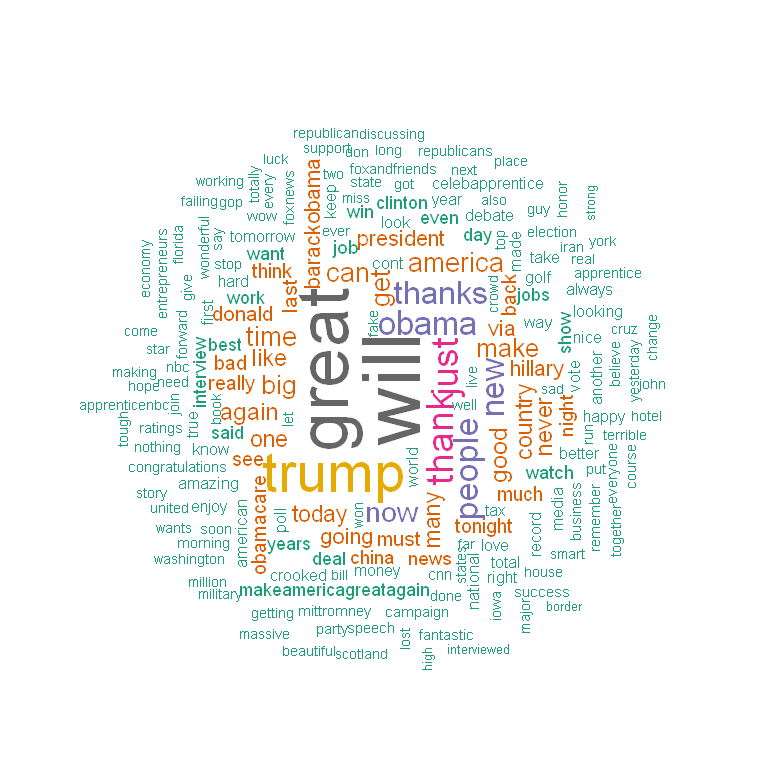

In [53]:
# Changing the size of the graphic
options(repr.plot.width = 6.5, repr.plot.height=6.5)

wordcloud(words = d$word, freq = d$freq, min.freq = 1,
          max.words=200, random.order=FALSE, rot.per=0.35, 
          colors=brewer.pal(8, "Dark2"))

### The TrumpCloud Function
I wanted to be able to visualize the word cloud by year, and so decided to create a function with year as the input. As I already wrote the code, packaging it together into a function was easy:

In [54]:
TrumpCloud <- function(year){
  # Loading packages
  Packages<-c("tidyverse", "tm", "SnowballC", "wordcloud", "RColorBrewer")
  lapply(Packages, require, character.only = TRUE)

  df <- dslabs::trump_tweets %>% 
    mutate(TweetDate = as.Date(created_at)) %>%
    filter(substr(TweetDate,1,4) == year) 

  # Extracting the text field from the data and storing as a `Corpus` object
  text <- Corpus(VectorSource(df$text))

  # Specifying that all patterns identified are to be converted to a space
  toSpace <- content_transformer(function (x , pattern ) gsub(pattern, " ", x))

  # Examples from link
  text <- tm_map(text, toSpace, "/") 
  text <- tm_map(text, toSpace, "@") 
  text <- tm_map(text, toSpace, "\\|")

  # Non-English Characters and Shared Links
  text <- tm_map(text, toSpace, "[^[:graph:]]")
  text <- tm_map(text, toSpace, "http.*")

  # Convert the text to lower case
  text <- tm_map(text, content_transformer(tolower))

  # Remove numbers
  text <- tm_map(text, removeNumbers)

  # Remove common English stopwords
  stops <- stopwords("english")
  stops <- stops[stops != "again"] # Keeping "again"

  text <- tm_map(text, removeWords, stops)

  # Remove your own stopwords as a character vector
  text <- tm_map(text, removeWords, c("amp")) 

  # Remove punctuations
  text <- tm_map(text, removePunctuation)

  # Eliminate extra white spaces
  text <- tm_map(text, stripWhitespace)

  # Converting to matrix, sorting, and converting to dataframe
  dtm <- TermDocumentMatrix(text)
  m <- as.matrix(dtm)
  v <- sort(rowSums(m),decreasing=TRUE)
  d <- data.frame(word = names(v),freq=v)

  # Changing the size of the graphic
  options(repr.plot.width = 6.5, repr.plot.height=6.5)                               

  # Creating the word cloud (keeping example parameters)
  wordcloud(words = d$word, freq = d$freq, min.freq = 1,
            max.words=200, random.order=FALSE, rot.per=0.35, 
            colors=brewer.pal(8, "Dark2"))                                
}

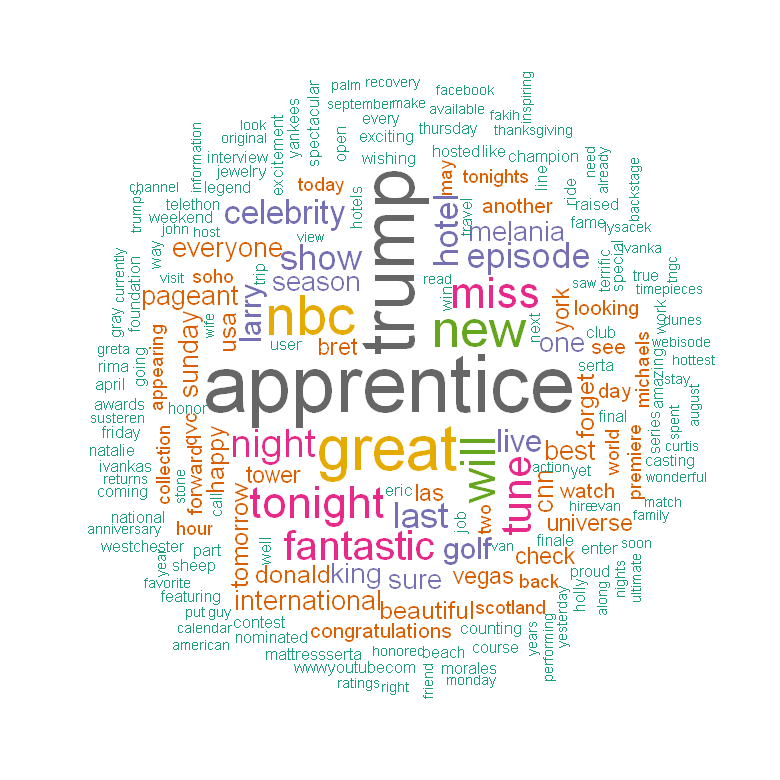

In [55]:
TrumpCloud(2010)

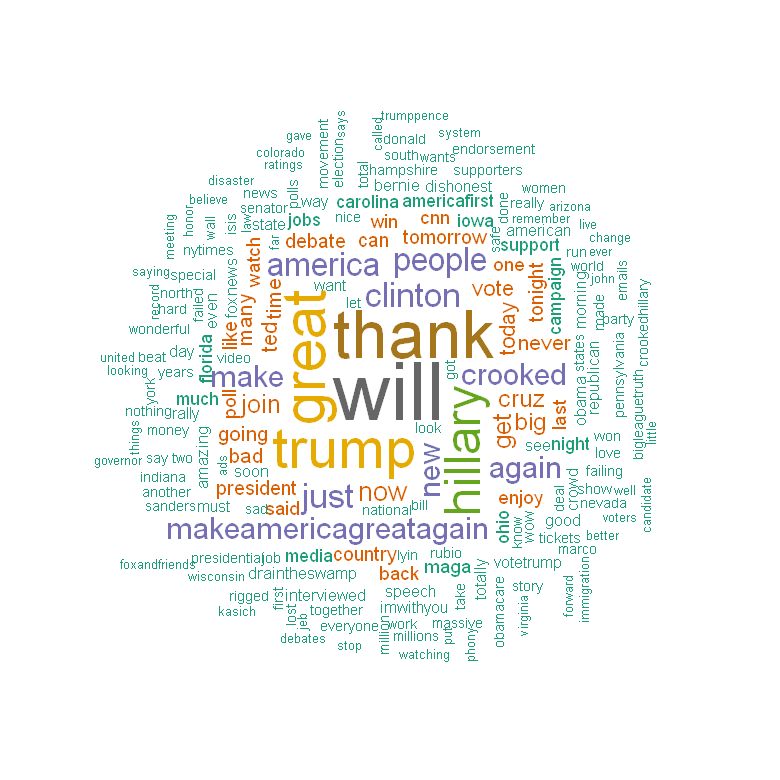

In [56]:
TrumpCloud(2016)